In [ ]:
"""Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their 
manufacturing unit there and producing cars locally to give competition to their US and 
European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing 
of cars depends. Specifically, they want to understand the factors affecting the pricing of cars 
in the American market, since those may be very different from the Chinese market.
The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
pricesheet=pd.read_csv(r'C:\Users\270881\Desktop\Python Pandas\datasets_175168_395113_CarPrice_Assignment.csv')

In [3]:
pricesheet.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
CompanyName= pricesheet["CarName"].apply(lambda x: x.split(" ")[0])

In [5]:
pricesheet.insert(3,"CompanyName",CompanyName)
pricesheet.drop(["CarName"],axis=1,inplace=True)


In [6]:
pricesheet.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
pricesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

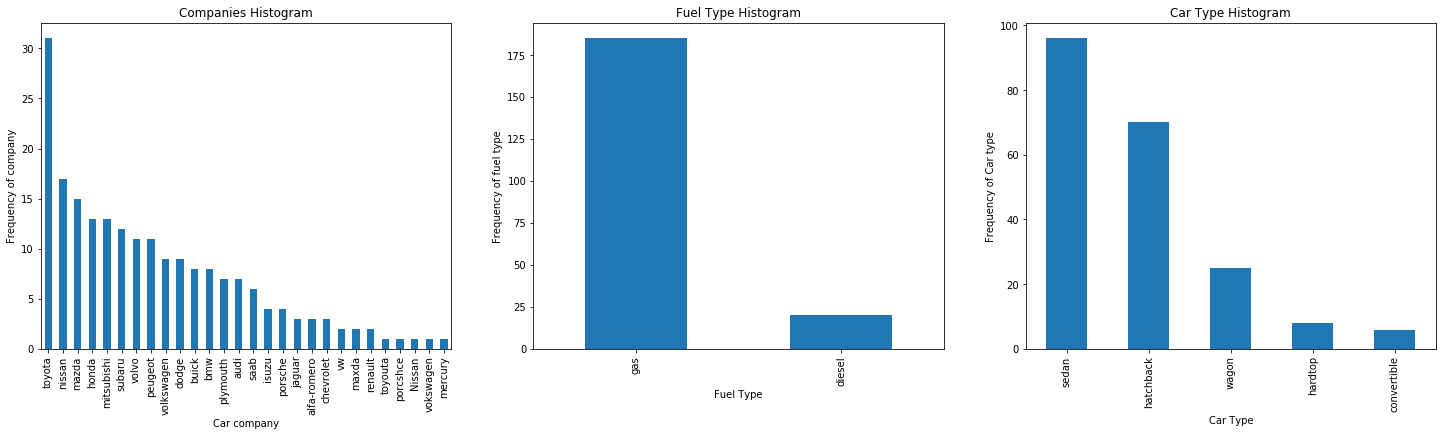

In [8]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = pricesheet.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = pricesheet.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = pricesheet.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

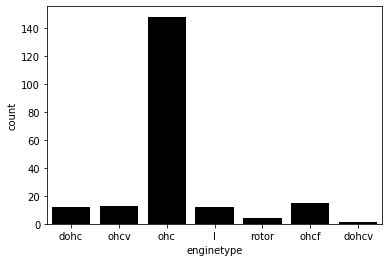

In [9]:
sns.countplot(pricesheet.enginetype,color="Black")


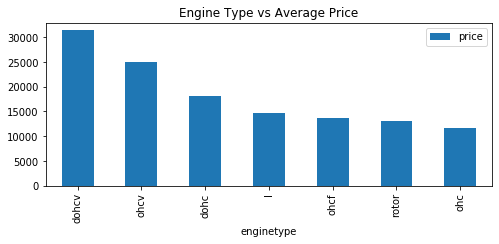

In [10]:
ss = pd.DataFrame(pricesheet.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
ss.plot.bar(figsize=(8,3))
plt.title('Engine Type vs Average Price')
plt.show()

In [11]:
"""ohc Engine type seems to be most favored type.
ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range
Toyota seemed to be favored car company.
Number of gas fueled cars are more than diesel.
sedan is the top car type prefered."""


'ohc Engine type seems to be most favored type.\nohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range\nToyota seemed to be favored car company.\nNumber of gas fueled cars are more than diesel.\nsedan is the top car type prefered.'

<Figure size 1800x432 with 0 Axes>

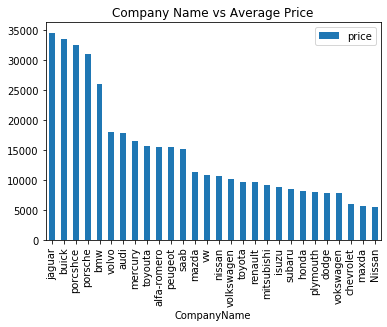

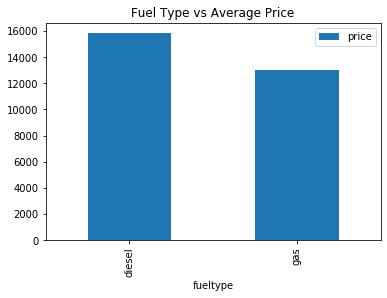

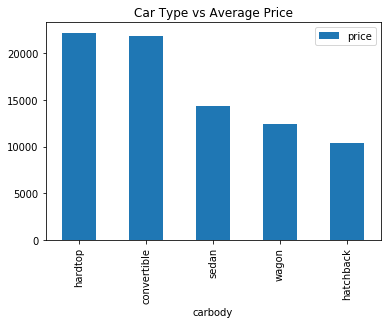

In [12]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(pricesheet.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(pricesheet.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(pricesheet.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [13]:

"""Inference :
Jaguar and Buick seem to have highest average price.
diesel has higher average price than gas.
hardtop and convertible have higher average price"""

'Inference :\nJaguar and Buick seem to have highest average price.\ndiesel has higher average price than gas.\nhardtop and convertible have higher average price'

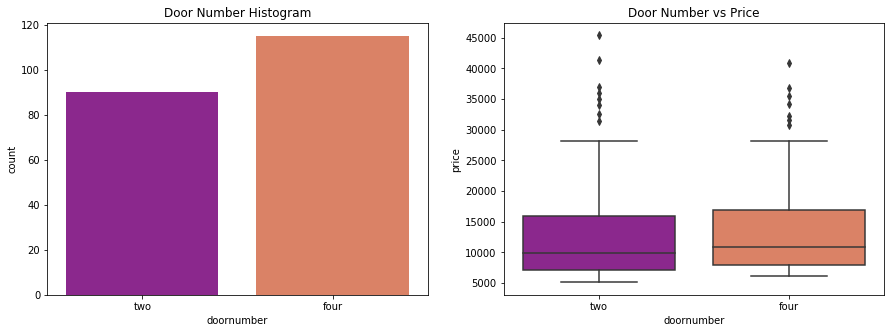

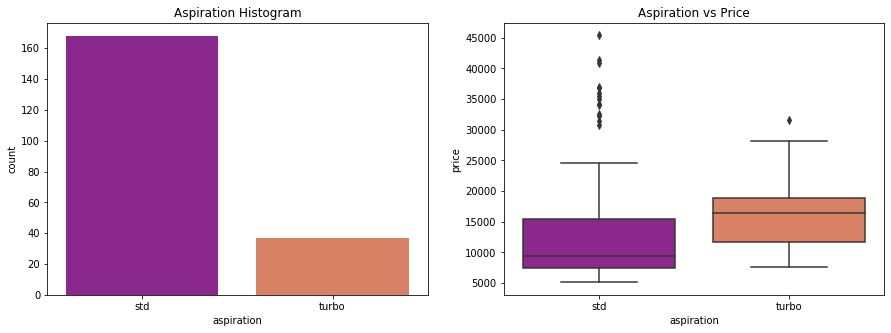

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(pricesheet.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=pricesheet.doornumber, y=pricesheet.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(pricesheet.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=pricesheet.aspiration, y=pricesheet.price, palette=("plasma"))

plt.show()


In [15]:
"""Inference:doornumber variable is not affecting the price much. 
There is no sugnificant difference between the categories in it.
It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)"""

'Inference:doornumber variable is not affacting the price much. \nThere is no sugnificant difference between the categories in it.\nIt seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)'

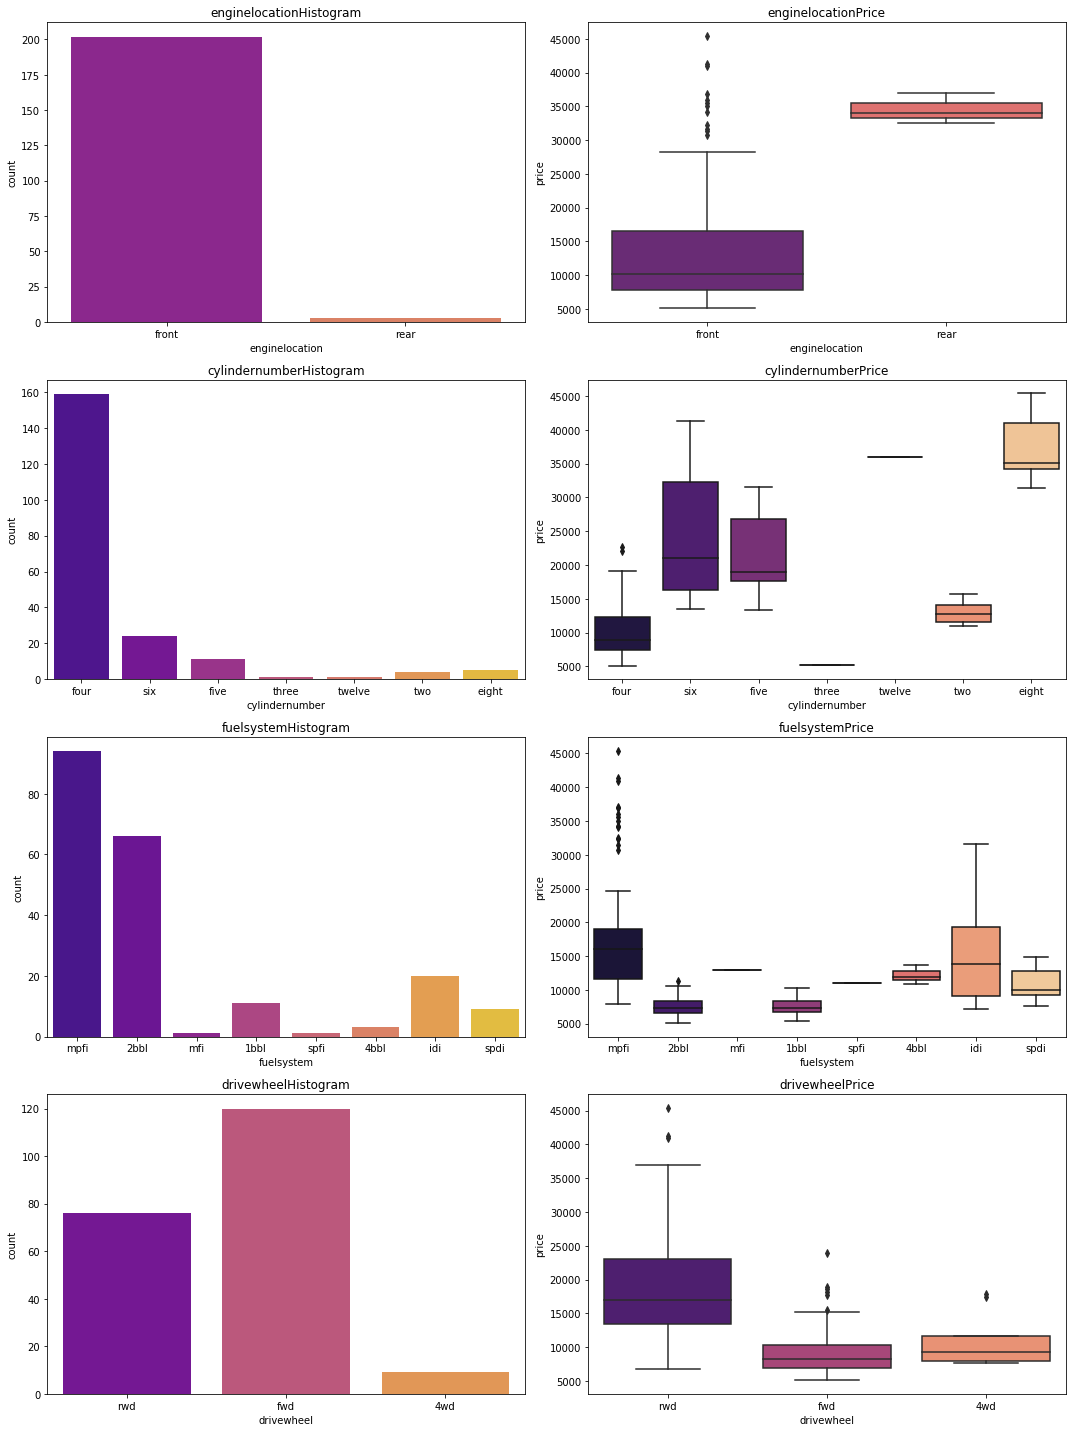

In [16]:
def plot_charts(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+"Histogram")
    sns.countplot(pricesheet[x],palette='plasma')
    plt.subplot(4,2,(fig+1))
    plt.title(x+"Price")
    sns.boxplot(x=pricesheet[x],y=pricesheet.price,palette='magma')
plt.figure(figsize=(15,20))

plot_charts('enginelocation', 1)
plot_charts('cylindernumber', 3)
plot_charts('fuelsystem', 5)
plot_charts('drivewheel', 7)
plt.tight_layout()


In [17]:
"""Inference :
Very few datapoints for enginelocation categories to make an inference.
Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.
But there are few data for other categories to derive any meaningful inference
A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel."""


'Inference :\nVery few datapoints for enginelocation categories to make an inference.\nMost common number of cylinders are four, six and five. Though eight cylinders have the highest price range.\nmpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.\nBut there are few data for other categories to derive any meaningful inference\nA very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.'

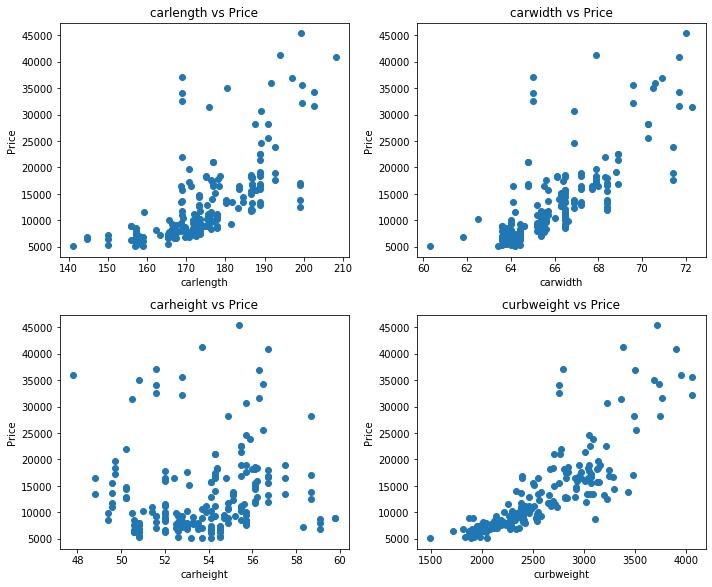

In [18]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(pricesheet[x],pricesheet['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [19]:
"""Inference :
carwidth, carlength and curbweight seems to have a poitive correlation with price.
carheight doesn't show any significant trend with price."""

"Inference :\ncarwidth, carlength and curbweight seems to have a poitive correlation with price.\ncarheight doesn't show any significant trend with price."

In [20]:
np.corrcoef(pricesheet['carlength'], pricesheet['carwidth'])[0, 1]

0.841118268481846

In [21]:
pricesheet['fueleconomy'] = (0.55 * pricesheet['citympg']) + (0.45 * pricesheet['highwaympg'])

In [22]:
pricesheet.head(3)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15


In [23]:
pricesheet['price'] = pricesheet['price'].astype('int')
temp = pricesheet.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
pricesheet['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
pricesheet.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [24]:
"""
List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel Type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy """

'\nList of significant variables after Visual analysis :\n- Car Range \n- Engine Type \n- Fuel Type \n- Car Body \n- Aspiration \n- Cylinder Number \n- Drivewheel \n- Curbweight \n- Car Length\n- Car width\n- Engine Size \n- Boreratio \n- Horse Power \n- Wheel base \n- Fuel Economy '

In [25]:
cars_lr = pricesheet[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


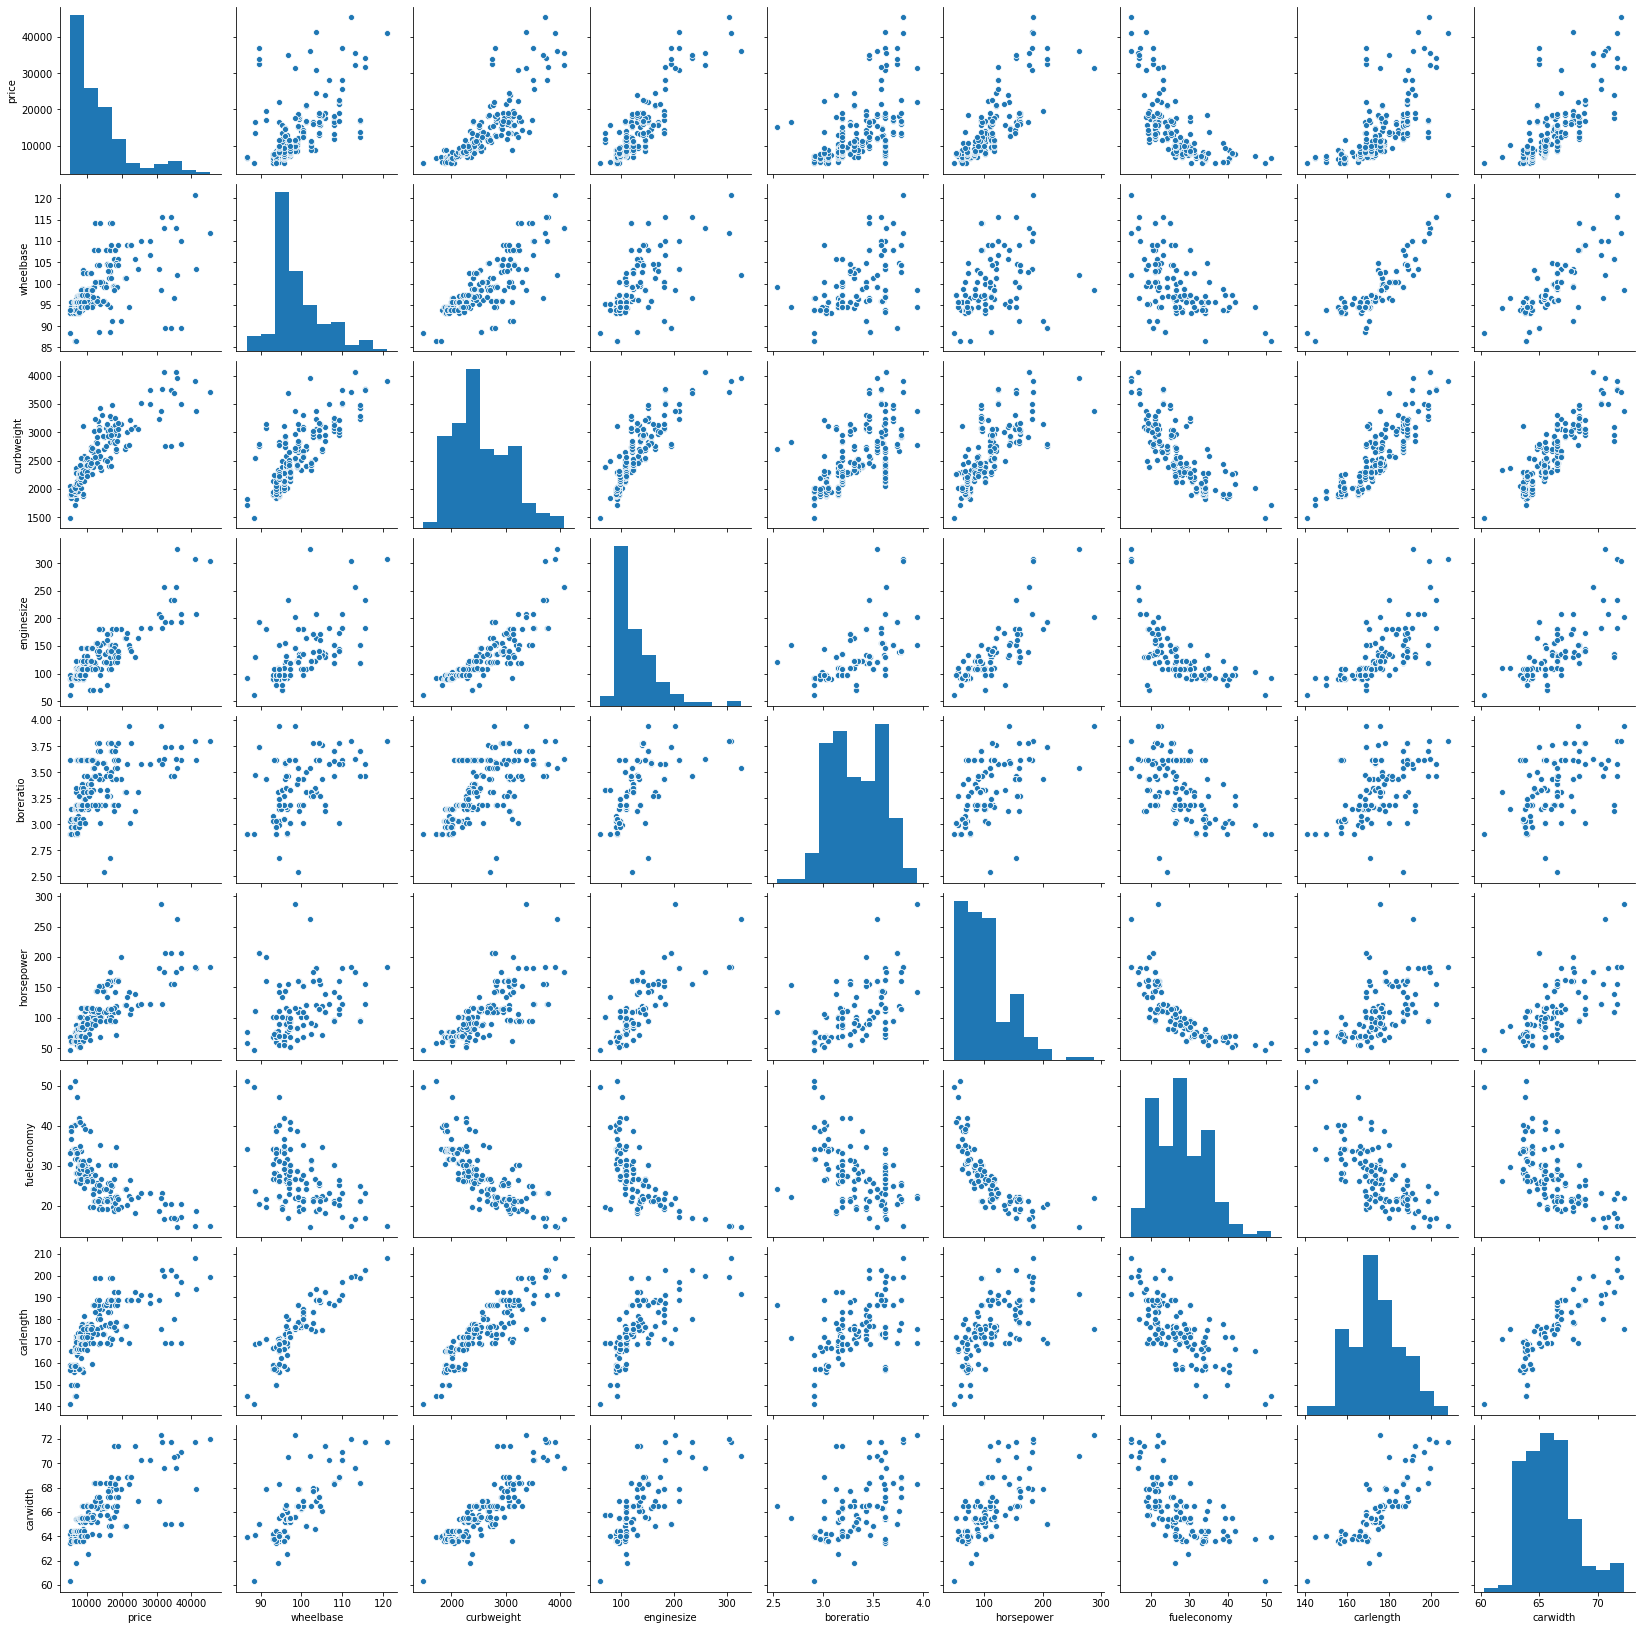

In [26]:
sns.pairplot(cars_lr,palette='plasma')
plt.show()

In [27]:
pd.options.display.max_columns=30

In [28]:
pd.options.display.max_rows=100

In [29]:
num=cars_lr.select_dtypes(include=['int','float',"int64","float64","int32"]).columns
num

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth'],
      dtype='object')

In [30]:
obj=list(cars_lr.select_dtypes(include=["object"]).columns)
obj.append("carsrange")
obj

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'carsrange']

In [31]:
type(cars_lr["carsrange"][0])

str

In [32]:
pricesheet.CompanyName=pricesheet.CompanyName.str.lower()
pricesheet.CompanyName.replace("vokswagen","volkswagen",inplace=True)
pricesheet.CompanyName.replace('maxda','mazda',inplace=True)
pricesheet.CompanyName.replace('porcshce','porsche',inplace=True)
pricesheet.CompanyName.replace('toyouta','toyota',inplace=True)
pricesheet.CompanyName.replace('vw','volkswagen',inplace=True)
pricesheet["CompanyName"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [33]:
pricesheet.CompanyName.replace("vokswagen","volkswagen")

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CompanyName, Length: 205, dtype: object

Skewness= 1.777678039491726


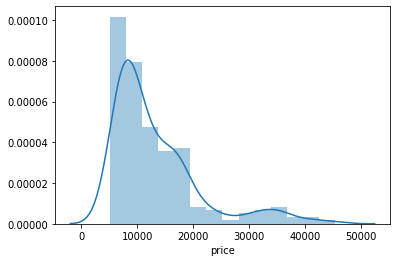

In [34]:
sns.distplot(cars_lr['price'])
print("Skewness=",cars_lr['price'].skew())

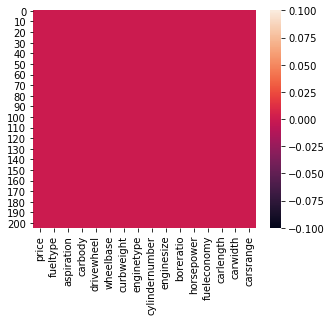

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(cars_lr.isnull())

In [36]:
df=cars_lr
df['fueltype']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

In [37]:
"""def one_hot_encode(s):
    df1=df
    i=0
    for x in s:
        print(x)
        df2=pd.get_dummies(df[x],drop_first=True)
        df.drop([x],axis=1,inplace=True)
        if i==0:
            df1=df2.copy()
        else:
            df1=pd.concat([df1,df2],axis=1)
        i=i+1
    df1=pd.concat([df1,df],axis=1)
    return df1"""
            
    

'def one_hot_encode(s):\n    df1=df\n    i=0\n    for x in s:\n        print(x)\n        df2=pd.get_dummies(df[x],drop_first=True)\n        df.drop([x],axis=1,inplace=True)\n        if i==0:\n            df1=df2.copy()\n        else:\n            df1=pd.concat([df1,df2],axis=1)\n        i=i+1\n    df1=pd.concat([df1,df],axis=1)\n    return df1'

In [38]:
"""df_final=one_hot_encode(obj)"""

'df_final=one_hot_encode(obj)'

In [39]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [40]:
df_final=cars_lr
df_final=df_final.loc[:,~df_final.columns.duplicated()]

In [41]:
df_final.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,...,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


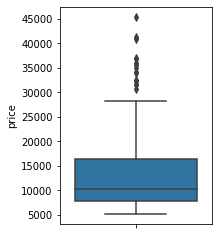

In [42]:
plt.subplot(1,2,1)
sns.boxplot(y=df_final["price"])

In [43]:
df_final['price'].describe(percentiles=[0.5,0.6,0.75,0.85,0.9])

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
50%      10295.000000
60%      12515.600000
75%      16503.000000
85%      18500.000000
90%      22563.000000
max      45400.000000
Name: price, dtype: float64

In [44]:
"""Inference :
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.
(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)"""

'Inference :\nThe plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).\nThere is a significant difference between the mean and the median of the price distribution.\nThe data points are far spread out from the mean, which indicates a high variance in the car prices.\n(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)'

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_final.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,...,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
num=list(num)

In [68]:
df_train,df_test= train_test_split(df_final,train_size= 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,...,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,7609,93.7,2191,98,2.97,68,34.15,167.3,63.8,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,22.60,168.9,68.3,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,27.35,168.7,64.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,19.25,188.8,67.2,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [69]:
scaler=MinMaxScaler()
df_train[num]=scaler.fit_transform(df_train[num])
df_test[num]=scaler.fit_transform(df_test[num])



C:\Users\270881\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\270881\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\270881\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [70]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,...,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


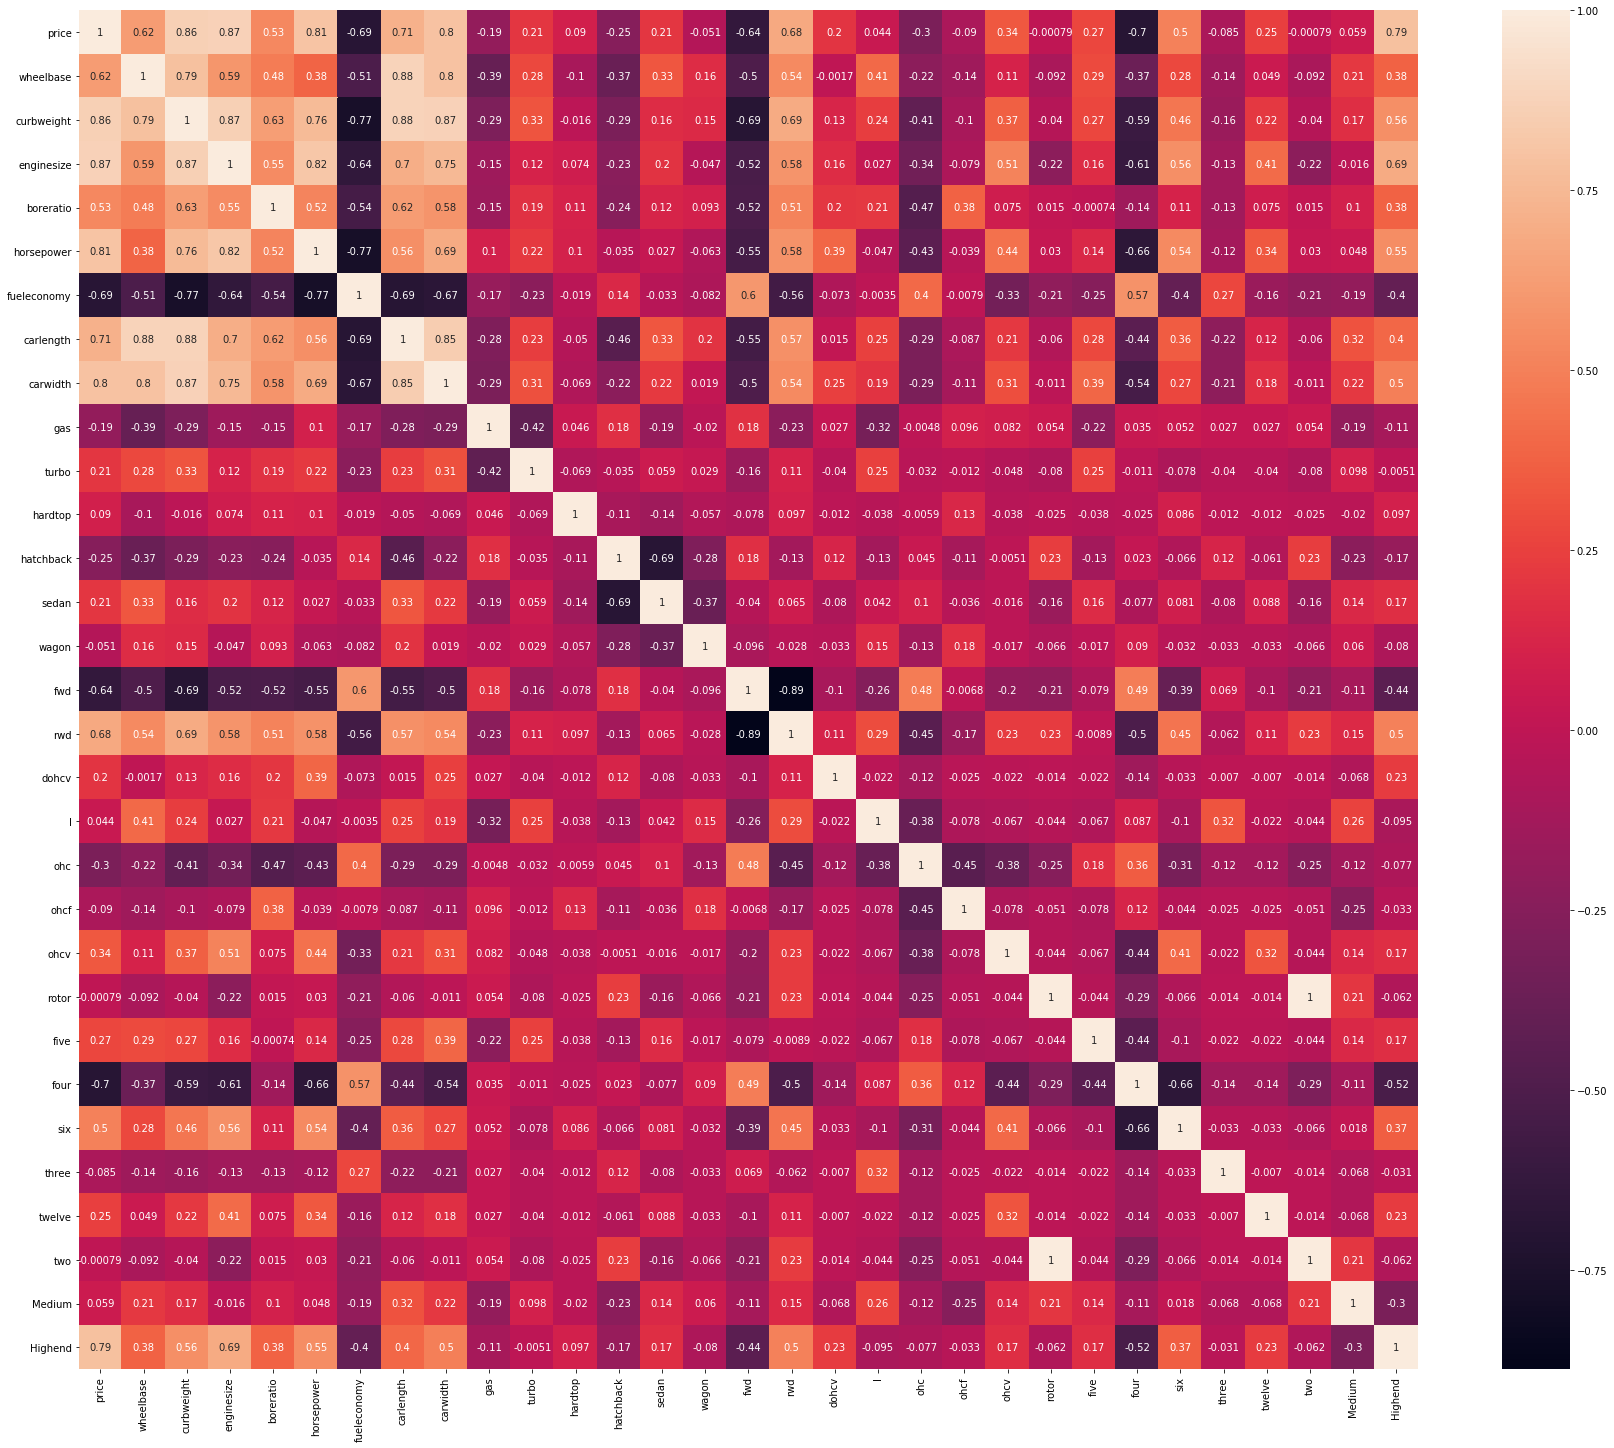

In [71]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [107]:
"""Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend."""

'Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.'

In [108]:
type(df_train['price'][0])

numpy.float64

In [109]:
x_train=df_train.drop(["price"],axis=1)
y_train=df_train["price"]
model=LinearRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
rmse= mean_squared_error(y_test,y_predicted)
rmse


0.011005111791736378

In [110]:
r2_score(y_test,y_predicted)


0.7485465302389642

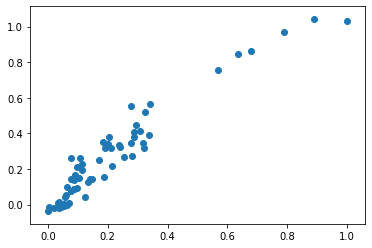

In [111]:
plt.scatter(y_test,y_predicted)

In [77]:
from sklearn.metrics import precision_score

In [78]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [79]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(x_train, y_train)

In [80]:
lm = sm.OLS(y_train,x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              152.8
Date:                Tue, 11 Aug 2020   Prob (F-statistic):                    4.43e-78
Time:                        09:20:30   Log-Likelihood:                          229.46
No. Observations:                 143   AIC:                                     -400.9
Df Residuals:                     114   BIC:                                     -315.0
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
wheelbase       0.1031      0.073      1.420      0.158      -0.041       0.247
curbweight      0.2531      0.130      1.940      0.055      -0.005       0.512
enginesize      0.0717      0.170      0.422      0.674      -0.265       0.409
boreratio      -0.1092      0.062     -1.763      0.081      -0.232       0.013
horsepower      0.5847      0.125      4.670      0.000       0.337       0.833
fueleconomy     0.1182      0.067      1.768      0.080      -0.014       0.251
carlength      -0.0475      0.094     -0.507      0.613      -0.233       0.138
carwidth        0.2182      0.086      2.543      0.012       0.048       0.388
gas            -0.0220      0.027     -0.827      0.410      -0.075       0.031
turbo          -0.0080      0.021     -0.379      0.705      -0.050       0.034
hardtop        -0.0983      0.053     -1.865      0.065      -0.203       0.006
hatchback      -0.1372      0.041     -3.329      0.001      -0.219      -0.056
sedan          -0.1207      0.043     -2.810      0.006      -0.206      -0.036
wagon          -0.1421      0.045     -3.132      0.002      -0.232      -0.052
fwd            -0.0216      0.027     -0.807      0.421      -0.075       0.031
rwd             0.0118      0.030      0.391      0.697      -0.048       0.071
dohcv          -0.3125      0.104     -3.011      0.003      -0.518      -0.107
l               0.0018      0.037      0.047      0.962      -0.072       0.076
ohc             0.0758      0.027      2.810      0.006       0.022       0.129
ohcf            0.1154      0.039      2.986      0.003       0.039       0.192
ohcv           -0.0365      0.033     -1.104      0.272      -0.102       0.029
rotor           0.0053      0.039      0.136      0.892      -0.071       0.082
five           -0.1158      0.055     -2.116      0.037      -0.224      -0.007
four           -0.0939      0.063     -1.503      0.136      -0.218       0.030
six            -0.0761      0.050     -1.532      0.128      -0.174       0.022
three           0.0804      0.105      0.767      0.445      -0.127       0.288
twelve         -0.1737      0.094     -1.853      0.067      -0.360       0.012
two             0.0053      0.039      0.136      0.892      -0.071       0.082
Medium          0.0450      0.015      3.048      0.003       0.016       0.074
Highend         0.2312      0.028      8.183      0.000       0.175       0.287
==============================================================================
Omnibus:                       48.350   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.729
Skew:                           1.213   Prob(JB):                     5.12e-38
Kurtosis:                   

In [81]:
def build_model(x,y):
    x=sm.add_constant(x)
    lm=sm.OLS(y,x).fit()
    print(lm.summary())
    return x

from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(x):
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [82]:
#Model1
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(x_train, y_train)

In [83]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 20),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 18),
 ('dohcv', True, 1),
 ('l', False, 21),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 19),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 13),
 ('twelve', True, 1),
 ('two', False, 15),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [84]:
x_train.columns[True]

array([['wheelbase', 'curbweight', 'enginesize', 'boreratio',
        'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas',
        'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
        'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
        'six', 'three', 'twelve', 'two', 'Medium', 'Highend']],
      dtype=object)

In [85]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [86]:
x_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [87]:
x_train_rfe=x_train[x_train.columns[rfe.support_]]

In [88]:
x_train_rfe

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,0.354926,0.283333,0.311385,0.425000,0,1,0,0,0,0
103,0.609775,0.433333,0.189300,0.516667,0,1,0,0,0,0
67,0.786268,0.312500,0.234568,0.833333,0,1,0,0,0,1
24,0.185803,0.083333,0.530864,0.291667,1,0,0,0,0,0


In [89]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.29e-70
Time:                        09:20:33   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

In [90]:
x_train_new =x_train_new.drop(["twelve"],axis=1)

In [91]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           4.25e-71
Time:                        09:20:33   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [92]:
x_train_new =x_train_new.drop(["fueleconomy"],axis=1)

In [93]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           7.85e-72
Time:                        09:20:34   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [94]:
checkVIF(x_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [95]:
x_train_new =x_train_new.drop(["curbweight"],axis=1)

In [96]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           4.70e-70
Time:                        09:20:35   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [97]:
checkVIF(x_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


In [98]:
x_train_new =x_train_new.drop(["sedan"],axis=1)

In [99]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.68e-69
Time:                        09:20:35   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [100]:
checkVIF(x_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


In [101]:
x_train_new =x_train_new.drop(["wagon"],axis=1)

In [102]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.57e-70
Time:                        09:20:36   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [103]:
checkVIF(x_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13
